# Problem Statement:
    
This project aims to leverage a comprehensive dataset of daily gold prices spanning from January 19,
2014, to January 22, 2024, obtained from Nasdaq. The dataset encompasses key financial metrics for
each trading day, including the opening and closing prices, trading volume, as well as the highest and
lowest prices recorded during the day.

# Our Goal:

The main goal of the project is to analyze daily gold prices over a ten-year period, using key financial metrics such as opening and closing prices, trading volume, and highest and lowest prices. This analysis aims to identify trends, patterns, and factors influencing gold prices, and develop predictive models for forecasting future gold prices.

# Features:

1. Date: A unique identifier for each trading day.
    
2. Close: Closing price of gold on the respective date.
    
3. Volume: Gold trading volume on the corresponding date.
    
4. Open: Opening price of gold on the respective date.
    
5. High: The highest recorded price of gold during the trading day.
    
6. Low: The lowest price recorded for gold in the trading day.


# Target Variable:
1. Close: Closing price of gold on the respective date.


# Importing Libraries

In [137]:
import numpy as np 
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt
 
import warnings
warnings.filterwarnings("ignore") 
 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline 
from sklearn.linear_model import Lasso
 
from sklearn.ensemble import RandomForestRegressor 
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import GridSearchCV

In [138]:
#Loading the Dataset
df= pd.read_csv("C:/Users/admin/Downloads/goldstock.csv")
df

,Unnamed: 0,Date,Close,Volume,Open,High,Low
0,0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1
...,...,...,...,...,...,...,...
2506,2528,2014-01-28,1250.5,81426.0,1254.9,1261.9,1248.0
2507,2529,2014-01-27,1263.5,63419.0,1269.9,1280.1,1252.0
2508,2530,2014-01-24,1264.5,34998.0,1264.3,1273.2,1256.9
2509,2531,2014-01-23,1262.5,41697.0,1235.1,1267.1,1230.8


So, we have 2511 records in the dataset and 7 columns including Adjusted Close which is our target variable.

In [139]:
# Missing Values/Null Values
df.isna().sum()

Unnamed: 0    0
Date          0
Close         0
Volume        0
Open          0
High          0
Low           0
dtype: int64

That's great ! we dont have any missing values in our dataset

In [140]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2511 non-null   int64  
 1   Date        2511 non-null   object 
 2   Close       2511 non-null   float64
 3   Volume      2511 non-null   float64
 4   Open        2511 non-null   float64
 5   High        2511 non-null   float64
 6   Low         2511 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 137.4+ KB


In [141]:
df = df.drop("Unnamed: 0", axis = 1)
df

,Date,Close,Volume,Open,High,Low
0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1
...,...,...,...,...,...,...
2506,2014-01-28,1250.5,81426.0,1254.9,1261.9,1248.0
2507,2014-01-27,1263.5,63419.0,1269.9,1280.1,1252.0
2508,2014-01-24,1264.5,34998.0,1264.3,1273.2,1256.9
2509,2014-01-23,1262.5,41697.0,1235.1,1267.1,1230.8


As these are not going to make any impact on our the analysis

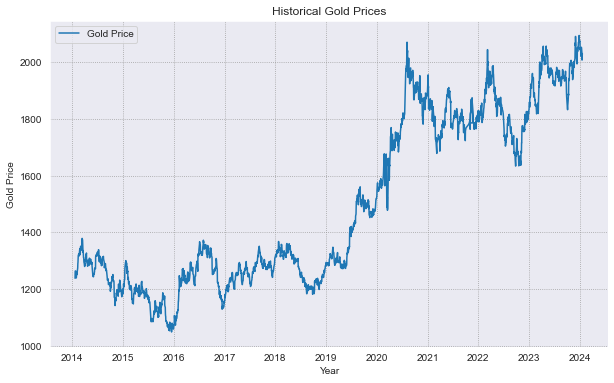

In [142]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Plot historical gold prices
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Gold Price')
plt.xlabel('Year')
plt.ylabel('Gold Price')
plt.title('Historical Gold Prices')
plt.legend()
plt.show()

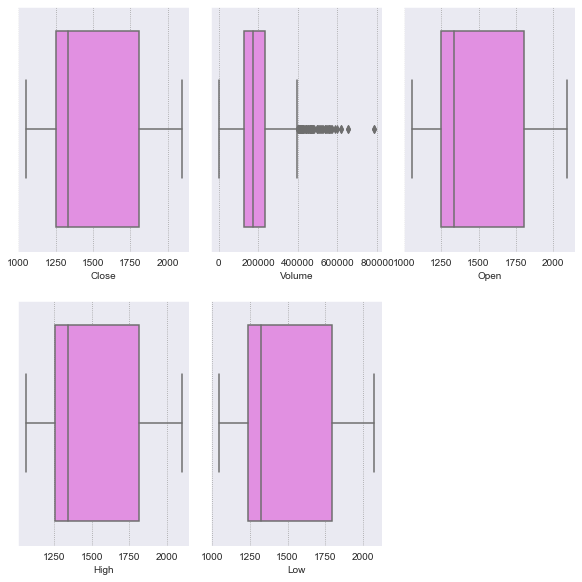

In [143]:
fig = plt.figure(figsize=(8, 8))
temp = df.drop("Date", axis=1).columns.tolist()
for i, item in enumerate(temp):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df, x=item, color='violet')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.show()

In [144]:
df['Volume'].skew()

0.9184323957685832

<AxesSubplot:xlabel='Volume', ylabel='Density'>

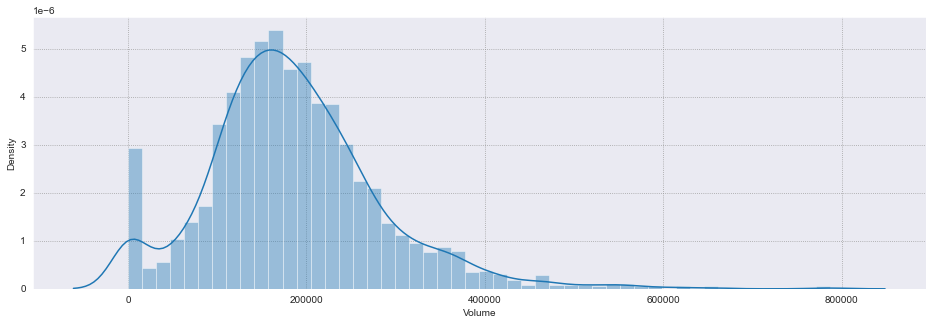

In [145]:
plt.figure(figsize = (16,5))
sns.distplot(df['Volume'])

In [146]:
df['Volume'].describe()

count      2511.000000
mean     185970.770609
std       97600.769382
min           1.000000
25%      126693.500000
50%      175421.000000
75%      234832.000000
max      787217.000000
Name: Volume, dtype: float64

<AxesSubplot:xlabel='Volume'>

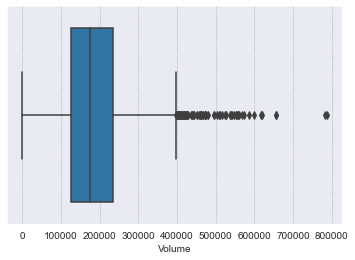

In [147]:
sns.boxplot(df['Volume'])

In [148]:
#finding the IQR # Calculate Q1 (25th percentile) and Q3 (75th percentile)

percentile25 = df['Volume'].quantile(0.25)
percentile75 = df['Volume'].quantile(0.75)

In [149]:
percentile75

234832.0

In [150]:
IQR = percentile75 - percentile25
IQR

108138.5

In [151]:
upperlimit = percentile75 + 1.5 *IQR
lowerlimit = percentile25 - 1.5 * IQR
print("Upperlimit : ", upperlimit)
print("lowerlimit : ", lowerlimit)

Upperlimit :  397039.75
lowerlimit :  -35514.25


In [153]:
# Identify outliers
outliers = df[(df['Volume'] < lowerlimit) | (df['Volume'] > upperlimit)]

print("Outliers identified using IQR method:")
print('')
print(outliers)


Outliers identified using IQR method:

           Date   Close    Volume    Open    High     Low
215  2023-03-13  1916.5  426262.0  1877.1  1919.5  1875.7
466  2022-03-08  2043.3  413624.0  2001.0  2078.8  1985.8
474  2022-02-24  1926.3  409954.0  1911.9  1976.5  1878.6
758  2021-01-08  1835.4  422485.0  1915.2  1918.4  1827.8
799  2020-11-09  1854.4  475721.0  1956.0  1869.3  1861.2
...         ...     ...       ...     ...     ...     ...
1598 2017-09-05  1344.5  546280.0  1339.8  1349.7  1331.1
1602 2017-08-29  1318.9  444146.0  1320.5  1331.9  1310.6
1801 2016-11-11  1224.3  420069.0  1258.7  1265.0  1218.7
1803 2016-11-09  1273.5  783657.0  1276.8  1338.3  1268.1
1899 2016-06-24  1322.4  527205.0  1254.3  1362.6  1252.8

[74 rows x 6 columns]


Drop the Outliers

In [154]:
df.drop(df[(df['Volume'] < lowerlimit) | (df['Volume'] > upperlimit)].index, inplace=True)

print("after removing outliers:", df.shape)

after removing outliers: (2437, 6)


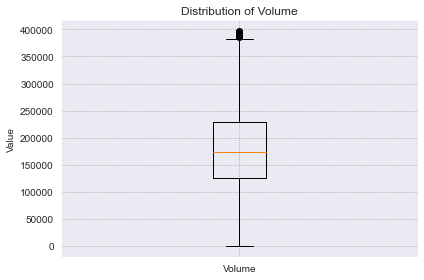

In [156]:

# Plot box plot for 'Volume' feature with logarithmic scaling
plt.figure(figsize=(6, 4))
plt.boxplot(df['Volume'])
plt.title('Distribution of Volume')
plt.ylabel('Value')
plt.xticks([1], ['Volume'])
plt.grid(True)
plt.tight_layout()
plt.show()
     

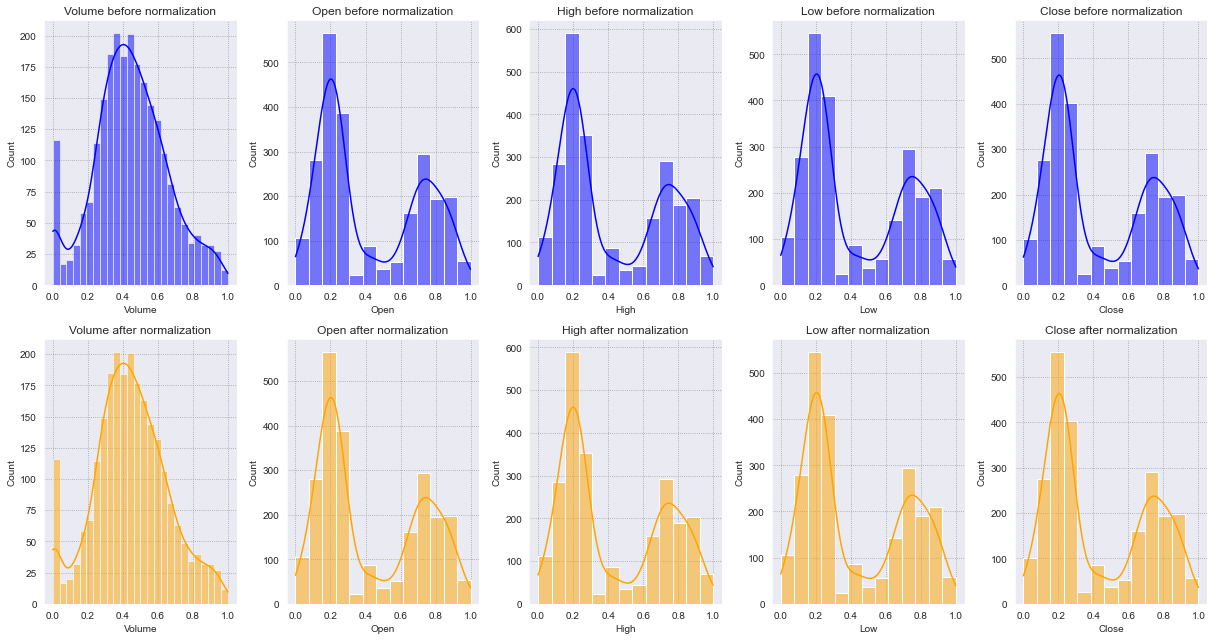

In [159]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Select columns to normalize
columns_to_normalize = ['Volume', 'Open', 'High', 'Low', 'Close']

# Plot distributions before normalization
plt.figure(figsize=(17, 9))
for i, col in enumerate(columns_to_normalize):
    plt.subplot(2, len(columns_to_normalize), i+1)
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f'{col} before normalization')

# Fit the scaler on the selected columns and transform the data
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Plot distributions after normalization
for i, col in enumerate(columns_to_normalize):
    plt.subplot(2, len(columns_to_normalize), len(columns_to_normalize) + i + 1)
    sns.histplot(df[col], kde=True, color='orange')
    plt.title(f'{col} after normalization')

plt.tight_layout()
plt.show()

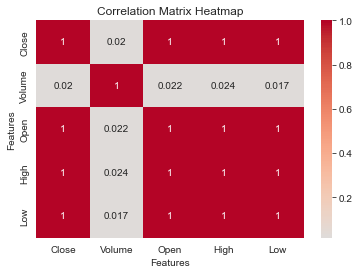

In [160]:
 # Calculate correlation matrix
correlation  = df.corr()
 
# Create heatmap
sns.heatmap(correlation, cmap='coolwarm',
            center=0, annot=True)
 
# Set title and axis labels
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
 
# Show plot
plt.show()

# Plot distribution of Gold Price and Trading Volume

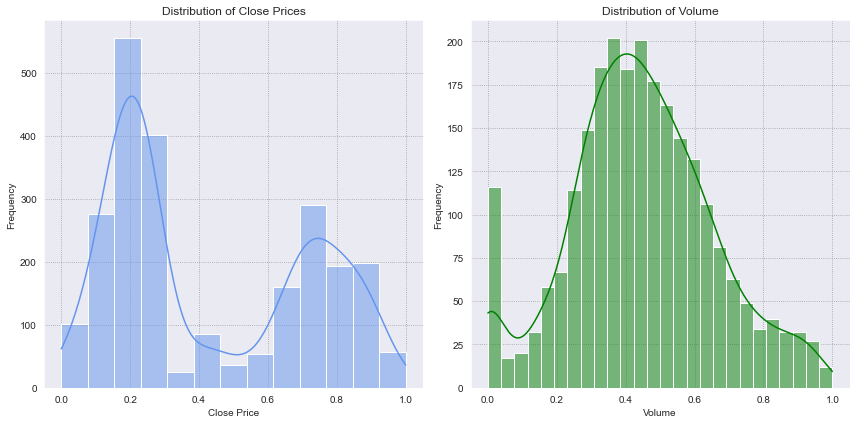

In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing the time series data

# Plot distribution of Close prices and Volume
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Close'], kde=True, color='#6495ED')
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.histplot(df['Volume'], kde=True, color='green')
plt.title('Distribution of Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()





In [171]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Sort the DataFrame by the date index in ascending order
df = df.sort_index(ascending=True)

# Print the DataFrame to verify the changes
print(df.head())


               Close    Volume      Open      High       Low
Date                                                        
2014-01-22  0.181121  0.202344  0.181225  0.174602  0.184707
2014-01-23  0.204025  0.105119  0.176048  0.197393  0.180140
2014-01-24  0.205942  0.088230  0.204046  0.203283  0.205499
2014-01-27  0.204983  0.159882  0.209416  0.209947  0.200738
2014-01-28  0.192525  0.205279  0.195033  0.192371  0.196852


In [178]:
#Extract features from Date column
df['Month'] = df.index.month
df['Year'] = df.index.year
df['Day'] = df.index.day
#df.drop('Date')

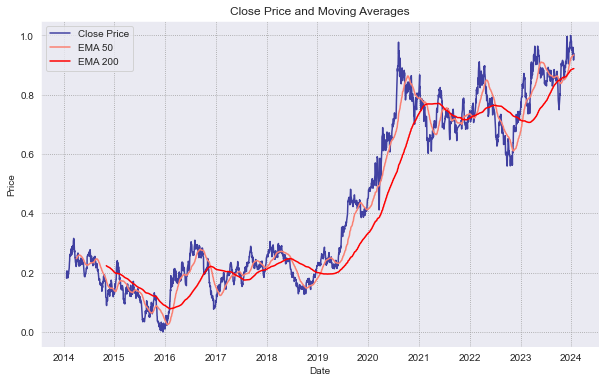

In [176]:
# Moving averages
window_1 = 50
window_2 = 200
close_prices_ma_1 = df['Close'].rolling(window=window_1).mean()
close_prices_ma_2 = df['Close'].rolling(window=window_2).mean()

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label="Close Price", color='#4040a1')
plt.plot(df.index, close_prices_ma_1, label="EMA 50 ", color='Salmon')
plt.plot(df.index, close_prices_ma_2, label="EMA 200 ", color='red')
plt.title('Close Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

 Yearly analysis of gold price.

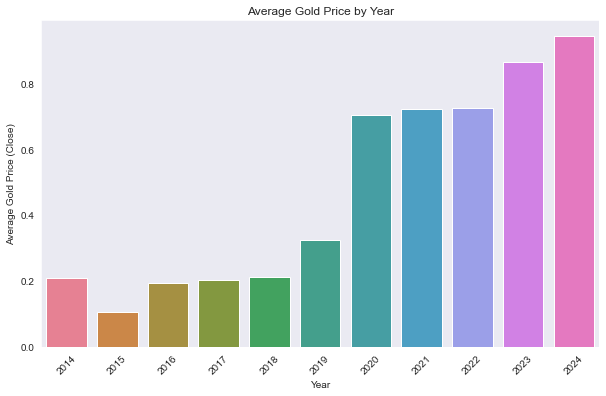

In [180]:
plt.figure(figsize=(10,6))
sns.barplot(x='Year', y='Close', data=df.groupby('Year')['Close'].mean().reset_index(), palette="husl")
plt.title('Average Gold Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Gold Price (Close)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

average gold price (close) for each day of the month.

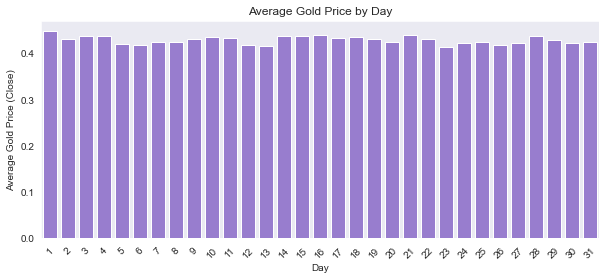

In [181]:
plt.figure(figsize=(10,4))
sns.barplot(x='Day', y='Close', data=df.groupby('Day')['Close'].mean().reset_index(), color='#9370DB')
plt.title('Average Gold Price by Day')
plt.xlabel('Day')
plt.ylabel('Average Gold Price (Close)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
     

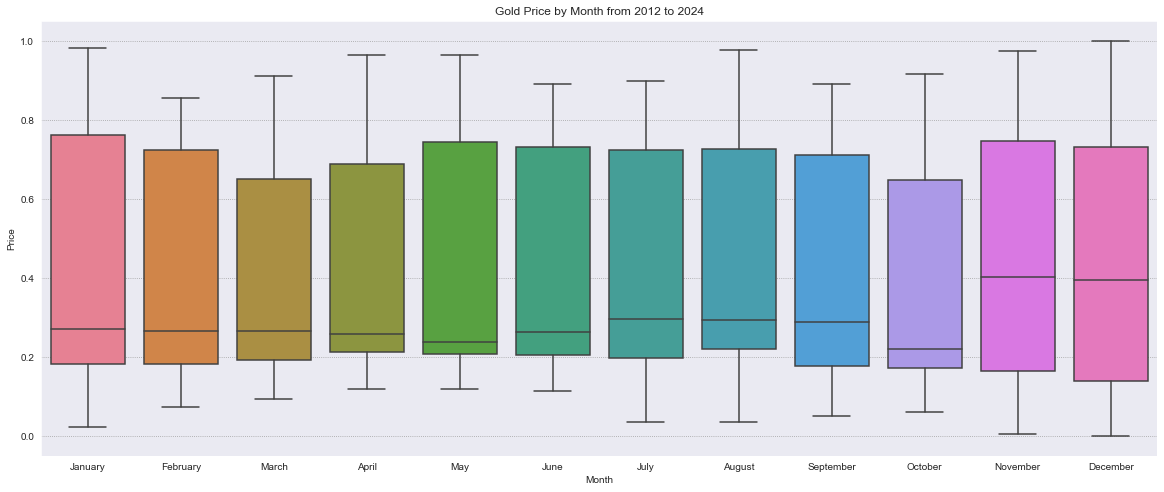

In [183]:
custom_palette = sns.color_palette("husl", 12)

fig, ax = plt.subplots(figsize=(20,8))
sns.boxplot(x=df.index.month_name(), y=df['Close'], ax=ax, palette=custom_palette)
plt.title('Gold Price by Month from 2012 to 2024')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

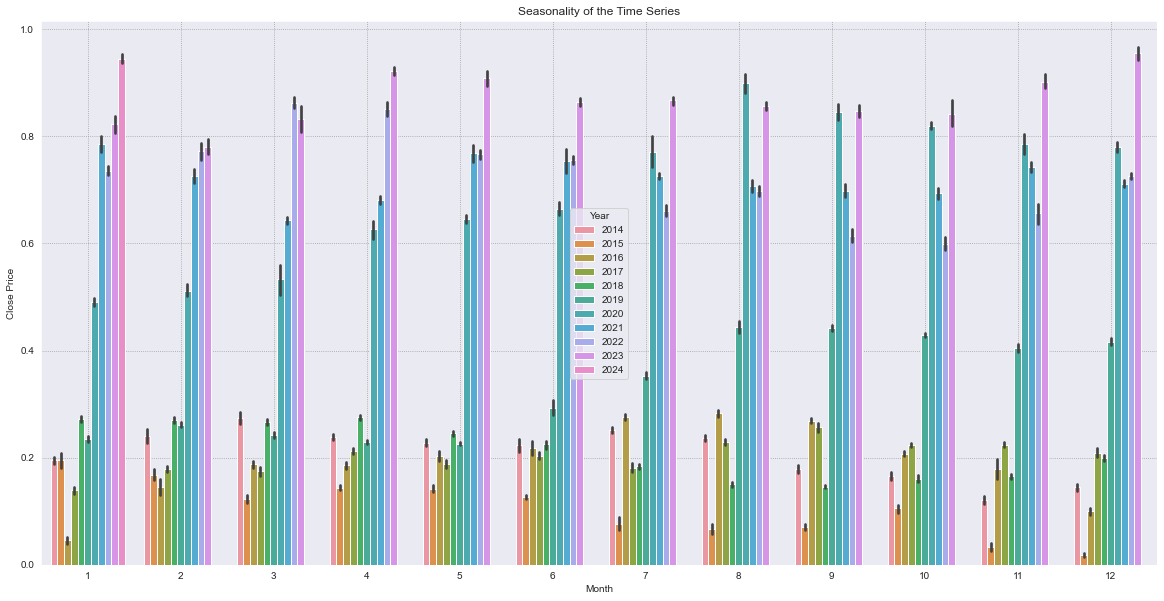

In [188]:
plt.figure(figsize=(20,10))
plt.title('Seasonality of the Time Series')

sns.barplot(x='Month', y='Close', data=df , hue='Year')

plt.xlabel('Month')
plt.ylabel('Close Price')

plt.grid(True)
plt.show()

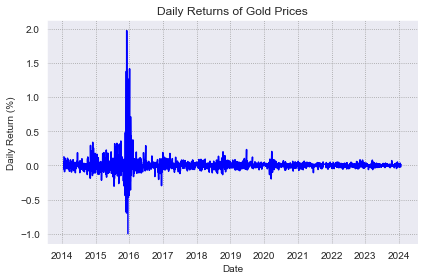

In [189]:
 # Calculate daily returns
daily_returns = df['Close'].pct_change()

# Plot the daily returns
plt.plot(daily_returns.index, daily_returns,color='blue')
plt.xlabel("Date")
plt.ylabel("Daily Return (%)")
plt.title("Daily Returns of Gold Prices")
plt.tight_layout()
plt.show()


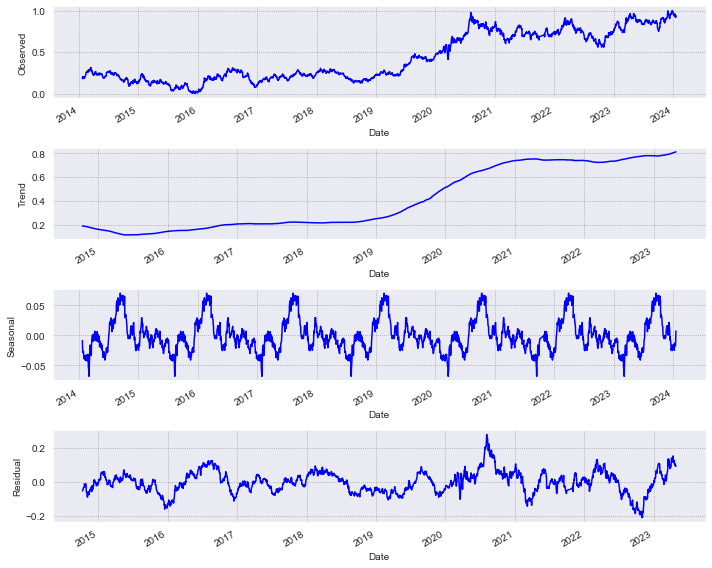

In [197]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Close'], model='additive', period=365)
fig, axes = plt.subplots(4, 1, figsize=(10, 8))

# Plot each component and set the color to blue
result.observed.plot(ax=axes[0], color='blue')
axes[0].set_ylabel('Observed')

result.trend.plot(ax=axes[1], color='blue')
axes[1].set_ylabel('Trend')

result.seasonal.plot(ax=axes[2], color='blue')
axes[2].set_ylabel('Seasonal')

result.resid.plot(ax=axes[3], color='blue')
axes[3].set_ylabel('Residual')

plt.tight_layout()
plt.show()

In [198]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from keras.models import Sequential
from keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from math import sqrt
from sklearn.metrics import r2_score
from tensorflow.keras import regularizers

In [199]:
df.head(2)

,Close,Volume,Open,High,Low,Month,Year,Day
Date,,,,,,,,
2014-01-22,0.181121,0.202344,0.181225,0.174602,0.184707,1,2014,22
2014-01-23,0.204025,0.105119,0.176048,0.197393,0.180140,1,2014,23


## splitting data to train and test

In [125]:
# Split the data into features (X) and target variable (y)
X = df[['Volume', 'Open', 'High', 'Low']]  # Features: Volume, Open, High, Low
y = df['Close']  # Target variable: Closing price

In [202]:
split_index = pd.to_datetime('2022-01-01')

train = df[df.index <= split_index]
test = df[df.index > split_index]

X_train = train.drop(columns=['Close'])
y_train = train['Close']

X_test = test.drop(columns=['Close'])
y_test = test['Close']

print(" X_train:", X_train.shape)
print(" y_train:", y_train.shape)
print(" X_test:", X_test.shape)
print(" y_test:", y_test.shape)
train_pct = len(train) / len(df) * 100
test_pct = len(test) / len(df) * 100
print()
print("Percentage of data in training set:", round(train_pct, 2), '%')
print("Percentage of data in testing set:", round(test_pct, 2), '%')

 X_train: (1929, 7)
 y_train: (1929,)
 X_test: (508, 7)
 y_test: (508,)

Percentage of data in training set: 79.15 %
Percentage of data in testing set: 20.85 %


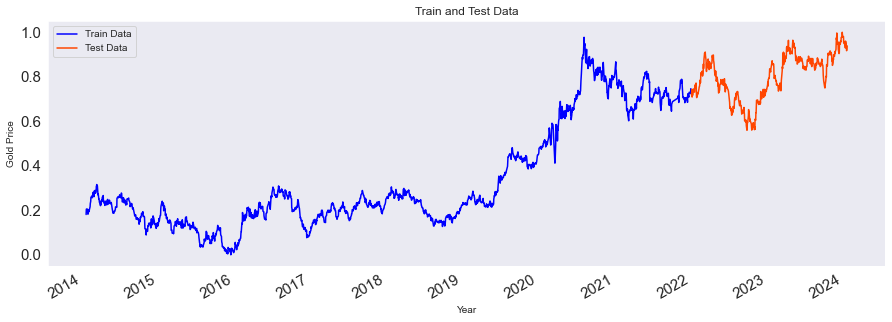

In [204]:
train['Close'].plot(figsize=(15,5), color='blue')
test['Close'].plot(figsize=(15,5), fontsize=15,color='OrangeRed')
plt.grid()
plt.legend(['Train Data', 'Test Data'])
plt.title('Train and Test Data')
plt.xlabel('Year')
plt.ylabel('Gold Price')
plt.show()
     

In [205]:
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

linear_reg = LinearRegression()
grid_search = GridSearchCV(estimator=linear_reg, param_grid=param_grid, cv=10, scoring='r2', verbose=1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_linear_reg = grid_search.best_estimator_

y_pred = best_linear_reg.predict(X_test)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


In [207]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Evaluation Metrics:")
print()
print("Best Hyperparameters:", best_params)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Evaluation Metrics:

Best Hyperparameters: {'fit_intercept': True, 'positive': False}
Mean Squared Error (MSE): 4.263986736042809e-05
Root Mean Squared Error (RMSE): 0.006529920930641357
Mean Absolute Error (MAE): 0.005159467789286419
R-squared (R2): 0.995905881785643


In [208]:
test_scores = grid_search.cv_results_['split0_test_score'], grid_search.cv_results_['split1_test_score'], grid_search.cv_results_['split2_test_score'], grid_search.cv_results_['split3_test_score'], grid_search.cv_results_['split4_test_score'], grid_search.cv_results_['split5_test_score'], grid_search.cv_results_['split6_test_score'], grid_search.cv_results_['split7_test_score'], grid_search.cv_results_['split8_test_score'], grid_search.cv_results_['split9_test_score']

# Print the cross-validation scores for all folds
print("Cross-validation scores for the Last Model:")
for i, scores in enumerate(zip(*test_scores)):
    print(f"CV {i + 1}: {scores}")

Cross-validation scores for the Last Model:
CV 1: (0.9838340741883447, 0.9765694511378008, 0.9934748068949113, 0.99346042970361, 0.9848438649412197, 0.9944508996954421, 0.9943992425729175, 0.992033399984299, 0.9907657278872025, 0.9706094635900331)
CV 2: (0.9876286389829034, 0.9846166900330704, 0.9953104533476101, 0.9945283860217868, 0.9872618208567371, 0.9961935985372973, 0.9958773682107996, 0.9954374842459496, 0.9919531086878017, 0.9732993018184664)
CV 3: (0.9838291574360772, 0.9764923880556023, 0.9934639195163804, 0.9934365544915299, 0.9848210555155789, 0.9945048264776066, 0.9944836742223573, 0.9920173375751897, 0.9907851304626153, 0.970711186928719)
CV 4: (0.9875575533611514, 0.984542289102778, 0.9953070039344414, 0.994494642895563, 0.987332619049984, 0.9961859801367248, 0.996109373623932, 0.9954120174981366, 0.9919380431003064, 0.9732245568516481)


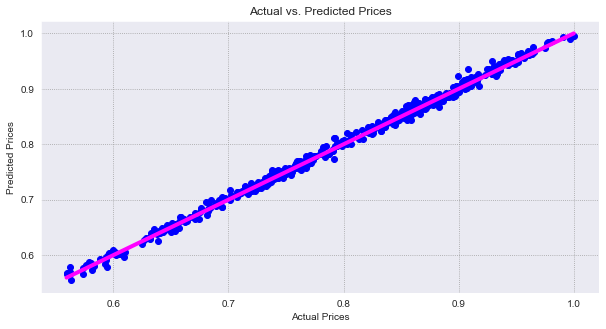

In [210]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=4, color='Magenta')
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

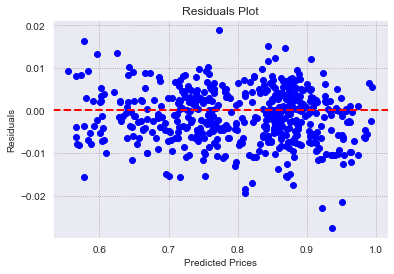

In [211]:
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.title('Residuals Plot')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


In [212]:
def create_sequences(df, column_name, sequence_length):
    sequence_as_np = df[column_name].to_numpy()
    X = []
    y = []

    for i in range(len(sequence_as_np) - sequence_length):
        row = [[a] for a in sequence_as_np[i:i + sequence_length]]
        X.append(row)
        label = sequence_as_np[i + sequence_length]
        y.append(label)

    return np.array(X), np.array(y)

In [213]:
SEQUENCE_LENGTH = 30
X, y = create_sequences(df, 'Close', SEQUENCE_LENGTH)
X = X.reshape(X.shape[0], -1)

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.reshape(-1, 1))
input = 2250
X_train, y_train = X[:input], y[:input]
X_test, y_test = X[input:], y[input:]
X_train.shape, y_train.shape , X_test.shape, y_test.shape
X_train = X_train.reshape(X_train.shape[0], SEQUENCE_LENGTH, 1)
X_test = X_test.reshape(X_test.shape[0], SEQUENCE_LENGTH, 1)
model = Sequential()
model.add(LSTM(units=100, activation='relu', return_sequences=False, input_shape=(SEQUENCE_LENGTH, 1)))
model.add(Dense(units=1))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [214]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, callbacks=[early_stopping])
y_predlstm = model.predict(X_test)

y_predlstm = y_predlstm.reshape(-1, 1)

y_predlstm  = scaler.inverse_transform(y_predlstm )
y_test = scaler.inverse_transform(y_test)

mse = mean_squared_error(y_test, y_predlstm)
rmse = sqrt(mse)
r_squared = r2_score(y_test, y_predlstm)

print(f'Mean Squared Error on Test Set: {mse}')
print(f'Root Mean Squared Error on Test Set: {rmse}')
print(f'R-squared on Test Set: {r_squared}')

Epoch 1/50
113/113 [==============================] - 9s 30ms/step - loss: 0.0131 - val_loss: 0.0017
Epoch 2/50
113/113 [==============================] - 2s 20ms/step - loss: 7.5043e-04 - val_loss: 0.0012
Epoch 3/50
113/113 [==============================] - 3s 24ms/step - loss: 6.7254e-04 - val_loss: 9.5912e-04
Epoch 4/50
113/113 [==============================] - 2s 22ms/step - loss: 6.3288e-04 - val_loss: 9.3907e-04
Epoch 5/50
113/113 [==============================] - 2s 21ms/step - loss: 5.8384e-04 - val_loss: 7.6994e-04
Epoch 6/50
113/113 [==============================] - 2s 22ms/step - loss: 5.3266e-04 - val_loss: 7.5666e-04
Epoch 7/50
113/113 [==============================] - 3s 22ms/step - loss: 5.2105e-04 - val_loss: 6.7413e-04
Epoch 8/50
113/113 [==============================] - 2s 21ms/step - loss: 5.4952e-04 - val_loss: 6.5810e-04
Epoch 9/50
113/113 [==============================] - 2s 21ms/step - loss: 4.8900e-04 - val_loss: 6.1453e-04
Epoch 10/50
113/113 [==========

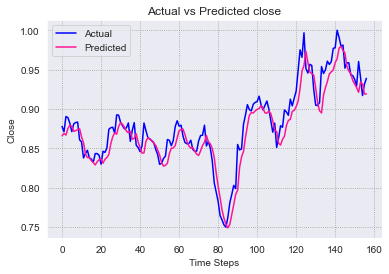

In [215]:
plt.plot(y_test, label='Actual',color='blue')
plt.plot(y_predlstm, label='Predicted',color='DeepPink')
plt.title('Actual vs Predicted close')
plt.xlabel('Time Steps')
plt.ylabel('Close')
plt.legend()
plt.show()

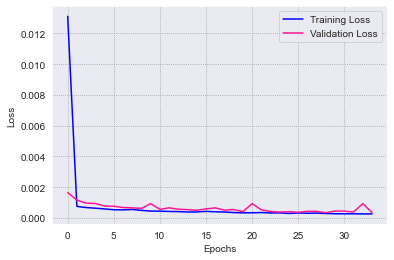

In [216]:
plt.plot(history.history['loss'], label='Training Loss',color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss',color='DeepPink')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

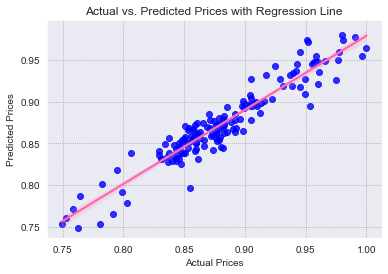

In [217]:
sns.regplot(x=y_test.flatten(), y=y_predlstm.flatten(), scatter_kws={'color': 'blue'}, line_kws={'color': 'hotpink'})
plt.title('Actual vs. Predicted Prices with Regression Line')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()
     

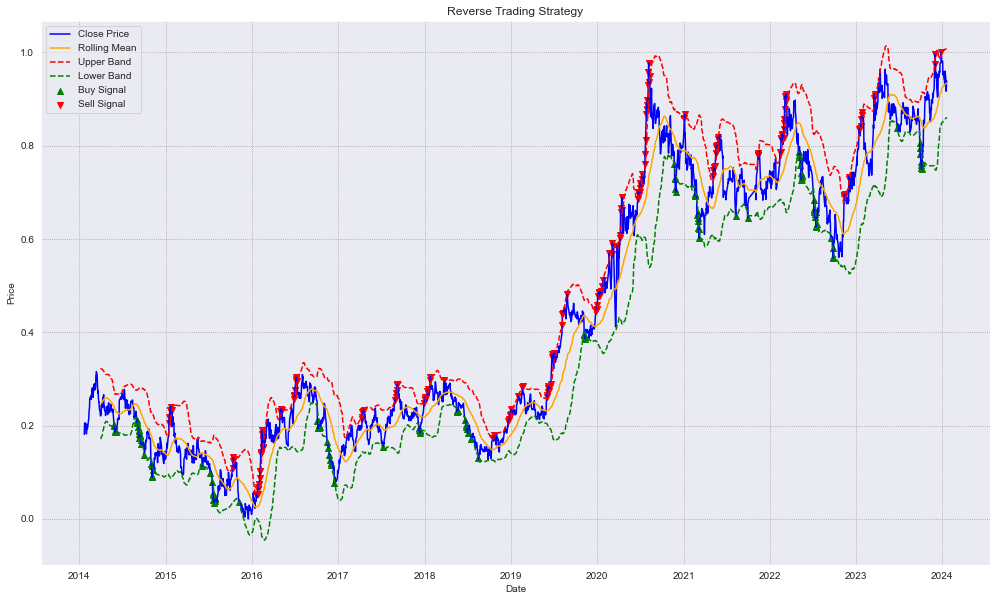

In [223]:
lookback_period = 50
entry_threshold = 2.0
exit_threshold = 0.0

df['RollingMean'] = df['Close'].rolling(window=lookback_period).mean()
df['RollingStd'] = df['Close'].rolling(window=lookback_period).std()

# Calculate upper and lower bands for entry and exit
df['UpperBand'] = df['RollingMean'] + entry_threshold * df['RollingStd']
df['LowerBand'] = df['RollingMean'] - entry_threshold * df['RollingStd']
exit_band = df['RollingMean'] + exit_threshold * df['RollingStd']

# Initialize trading signals
df['Signal'] = 0

# Generate trading signals
for i in range(lookback_period, len(df)):
    if df['Close'].iloc[i] > df['UpperBand'].iloc[i]:
        df.at[df.index[i], 'Signal'] = -1  # Sell signal (price above upper band)
    elif df['Close'].iloc[i] < df['LowerBand'].iloc[i]:
        df.at[df.index[i], 'Signal'] = 1  # Buy signal (price below lower band)
    elif df['Close'].iloc[i] > exit_band.iloc[i]:
        df.at[df.index[i], 'Signal'] = 0  # Exit signal (price above exit band)
    elif df['Close'].iloc[i] < exit_band.iloc[i]:
        df.at[df.index[i], 'Signal'] = 0  # Exit signal (price below exit band)

# Backtesting
initial_capital = 100000  # Initial capital in dollars
position = 0  # Initial position
cash = initial_capital  # Initial cash
portfolio_value = []  # Portfolio value over time

for i in range(lookback_period, len(df)):
    if df['Signal'].iloc[i] == 1:
        # Enter long position
        position = cash / df['Close'].iloc[i]  # Invest all available cash
        cash = 0  # No remaining cash after buying
    elif df['Signal'].iloc[i] == -1:
        # Enter short position
        cash += position * df['Close'].iloc[i]  # Sell all owned assets
        position = 0  # No remaining position after selling
    elif df['Signal'].iloc[i] == 0:
        # Exit position
        cash += position * df['Close'].iloc[i]  # Sell all owned assets
        position = 0  # No remaining position after selling

    # Calculate portfolio value
    portfolio_value.append(cash + position * df['Close'].iloc[i])

# Calculate performance metrics
total_return = (portfolio_value[-1] - initial_capital) / initial_capital
daily_returns = np.diff(portfolio_value) / portfolio_value[:-1]
sharpe_ratio = np.mean(daily_returns) / np.std(daily_returns) * np.sqrt(252)  # Assuming 252 trading days in a year
max_drawdown = np.max(np.maximum.accumulate(portfolio_value) - portfolio_value) / initial_capital

# Plotting
# Plotting
plt.figure(figsize=(17, 10))
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.plot(df.index, df['RollingMean'], label='Rolling Mean', color='orange')
plt.plot(df.index, df['UpperBand'], label='Upper Band', color='red', linestyle='--')
plt.plot(df.index, df['LowerBand'], label='Lower Band', color='green', linestyle='--')

# Filter 'Close' prices for buy and sell signals
buy_indices = df[df['Signal'] == 1].index
sell_indices = df[df['Signal'] == -1].index
buy_prices = df.loc[df['Signal'] == 1, 'Close']
sell_prices = df.loc[df['Signal'] == -1, 'Close']

# Plot buy and sell signals
plt.scatter(buy_indices, buy_prices, label='Buy Signal', marker='^', color='green')
plt.scatter(sell_indices, sell_prices, label='Sell Signal', marker='v', color='red')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Reverse Trading Strategy')
plt.legend()
plt.grid(True)
plt.show()

In [224]:
# Count the number of buy and sell signals
total_trades = len(df[df['Signal'] != 0])

# Count the number of successful buy and sell signals
successful_buy_trades = len(df[(df['Signal'] == 1) & (df['Close'] < df['UpperBand'])])
successful_sell_trades = len(df[(df['Signal'] == -1) & (df['Close'] > df['LowerBand'])])

# Calculate win rates
buy_win_rate = successful_buy_trades / total_trades
sell_win_rate = successful_sell_trades / total_trades

# Print win rates
print("Buy Win Rate:", buy_win_rate)
print("Sell Win Rate:", sell_win_rate)

Buy Win Rate: 0.3888888888888889
Sell Win Rate: 0.6111111111111112
